## Data Cleaning with Pandas

### Objectives
YWBAT 
* describe and apply strategies for handling null values
* "" for handling placeholders
* "" normalizing and standardizing data
* use method chaining to store slices of data to variables
* explain the importance of method chaining
* apply the groupby method to create a new dataframe
* create a pivot table

### Loading in super hero powers

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("super_hero_powers.csv")
df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Exploratory Data Analysis

You can check some quick details for the dataframe using `df.info()`. If there aren't too many columns, you'll also get details regarding the column data type and the number of non-null entries.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [4]:
df[df.columns[:10]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 10 columns):
hero_names               667 non-null object
Agility                  667 non-null bool
Accelerated Healing      667 non-null bool
Lantern Power Ring       667 non-null bool
Dimensional Awareness    667 non-null bool
Cold Resistance          667 non-null bool
Durability               667 non-null bool
Stealth                  667 non-null bool
Energy Absorption        667 non-null bool
Flight                   667 non-null bool
dtypes: bool(9), object(1)
memory usage: 11.2+ KB


### Count the null values in 'Agility' column

### Print any column that has a null value

### Load in heros_information.csv

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 63.1+ KB


### What does 'object' dtype indicate?

### Identify columns with null values

In [9]:
df2.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

**Fetch the null values in the Publisher column**

## What would you do at this point if Publisher was important?

In [11]:
# this is how we would manually input 'Dark Horse Comics' into the 'Astro Boy' row

df2.loc[df2.name=='Astro Boy', 'Publisher'] = 'Dark Horse Comics'

In [12]:
# you can fill nulls this way but it's better to use the .fillna method
df2.Publisher = df2.Publisher.fillna(value='Null')


## Finding Hidden Null Values

Sometime, while not explicitly missing, there are null values such as `999` hidden within a dataset. A good preliminary check is to look at the most common values for a column.

In [13]:
df2.name.value_counts().head() # you can apply a .head() to a Series object

Goliath       3
Spider-Man    3
Namor         2
Batgirl       2
Atom          2
Name: name, dtype: int64

### Use a for loop to print out the top 5 values for each column. Do you notice any suspicious entries?

## Mean Height and Weight

Calculate the mean height and weight of the superheros.

## Analyzing the Impact of Null Values

How do you think the hidden null values impacted your summary statistics for height and weight above?

## Appropriately Flagging Null Values

While null values aren't ideal, it's good to at least be able to easily identify them. Let's look at how you could quickly replace some of those hiddnen null values.

In [16]:
df2.Height.replace(to_replace=-99.0, value=np.nan, inplace=True)

## Check that the -99 values were removed from the Height column

## Replace the hidden null values in the weight column (and verify the change).

## Recalculate the Mean Height and Weight

### Methods for handling numerical nulls

Rather then leaving values as null, sometimes we may also wish to **impute** values by using an average value.

In [21]:
# replace with 0
df2['Height'].replace(to_replace=np.nan, value=0, inplace=True)
df2.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,0.0,Marvel Comics,-,bad,NaN


In [26]:
# replace with the mean Height
mean_height = 186.72630560928434
df2['Height'].replace(to_replace=0.0, value=mean_height, inplace=True)

df2.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.000000,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.000000,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.000000,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.000000,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,186.726306,Marvel Comics,-,bad,NaN


In [27]:
# replace with normal distribution of random numbers

mean_height = df2.Height.mean()
std_height = df2.Height.std()
num_missing = df2.Height.isna().sum()

new_values = np.random.normal(mean_height, std_height, num_missing)

df2.loc[df2.Height.isna(), 'Height'] = new_values

df2.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.000000,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.000000,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.000000,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.000000,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,186.726306,Marvel Comics,-,bad,NaN


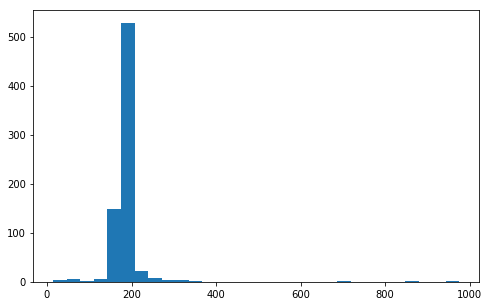

In [28]:
plt.figure(figsize=(8, 5))
plt.hist(df2.Height, bins=30)
plt.show()

### How can we filter placeholders?

## Replace all of the missing values from the `Skin color` feature with null values.

## Repeat this for the other features with placeholders for null values

## Other Options for Dealing with Null Values

* Dropping Features
* Imputing Null Values
    * Mean
    * Median
    * Regression
    * Other

In [40]:
#dropping a feature
df2 = df2.drop("Skin color", axis=1)
df2.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.000000,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.000000,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.000000,DC Comics,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.000000,Marvel Comics,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,186.726306,Marvel Comics,bad,NaN


## Now that my dataframe is cleaned, I'm going to save it as a clean file

In [41]:
df2.to_csv("./cleaned_heroes_information.csv", index=False) 
# This will create the dataframe without the index column (which is currently just a range of 0 to len(df)-1)

In [42]:
df3 = pd.read_csv("./cleaned_heroes_information.csv")
df3.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.000000,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.000000,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.000000,DC Comics,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.000000,Marvel Comics,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,186.726306,Marvel Comics,bad,NaN


## Renaming Columns with Spaces

Spaces in naming conventions are the bane of any programmer. How are you supposed to use tab completion or dot notation with those pesky spaces?! Using your knowledge of string methods and list comprehensions, create an updated list of column names that replaces all internal whitespace for a column name with dashes ('-').

Great! With this you now couild rename the columns directly using `df3.columns = renamed_cols`. But, let's be a little more verbose and practice our data manipulation skills! Create a dictionary using the `zip` method which maps the original column names to the reformatted column names you just made above.

> Hint: Pull up the docstring for the `zip` method with `zip?` if you are unsure how to use it. If you're still stuck, try experimenting a little or use a search engine to find further advice.

Awesome! Now rename the columns using the `.rename()` method on the DataFrame. Again, pull up the docstring with `df3.rename?` to help guide yourself. 

> Note: Again, you could have also renamed the columns directly with the original list you created above: `df3.columns = renamed_cols`. Nonetheless, try the `.rename()` method for further practice.

### Converting all lettering to lowercase

Practice your string methods and data wrangling some more! Convert all of the text data to lower case.

### Histogram

Lastly, let's practice making some histograms of feature distributions.

Plot the heights of all of the super heros.

# Comparing Male and Female Heights

What kind of visual would you use to compare male and female heights? Experiment with a few different plots and choose the one which you think best compares these two distributions.

### Assessment

### What did I learn?

I learned...
- that the replace function allows you to replace values in either the dataframe or a series of the dataframe
- you can search/group information based on data types by pulling the column then searching in the series
- null values can be used in ways that are meaningful, they aren't always bad. 

## Appendix

## What are the 10 most common super-hero races? What percentage of super-heros does this account for?

## What do you notice about the answer above?

## Splitting Entries with Concatenated Fields

Sometimes you may also need to split data from a column. Some common examples are splitting a lattitude/longitude field into two seperate fields, or splitting an address field into street, city, state and zipcode. 

Create your own value counts dictionary by iterating through the `Race` series and splitting apart multiple entries.

### Let's make a column with superpowers!!!!
* column name = superpowers
* dtype = list
* list populated by strings